# **Multilevel customized CNN sequential model with various optimizers and performance comparasion**


In [ ]:

#1. load a dataset

import tensorflow as tf
from google.colab import files 
files.upload() 




Saving archive.zip to archive.zip


In [ ]:
ls

archive.zip  sample_data/


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Data/test/adenocarcinoma/000108 (3).png  
  inflating: Data/test/adenocarcinoma/000109 (2).png  
  inflating: Data/test/adenocarcinoma/000109 (4).png  
  inflating: Data/test/adenocarcinoma/000109 (5).png  
  inflating: Data/test/adenocarcinoma/000112 (2).png  
  inflating: Data/test/adenocarcinoma/000113 (7).png  
  inflating: Data/test/adenocarcinoma/000114 (5).png  
  inflating: Data/test/adenocarcinoma/000114.png  
  inflating: Data/test/adenocarcinoma/000115 (4).png  
  inflating: Data/test/adenocarcinoma/000115 (8).png  
  inflating: Data/test/adenocarcinoma/000115.png  
  inflating: Data/test/adenocarcinoma/000116 (5).png  
  inflating: Data/test/adenocarcinoma/000116 (7).png  
  inflating: Data/test/adenocarcinoma/000116 (9).png  
  inflating: Data/test/adenocarcinoma/000117 (4).png  
  inflating: Data/test/adenocarcinoma/000117 (8).png  
  inflating: Data/test/adenocarcinoma/000117.png  
  inflating: Data/test/adenocarcinoma/000118 (5).png  


In [ ]:
ls

archive.zip  Data/  sample_data/


In [ ]:
data_dir= 'Data'
train_dir= 'Data/train'
validation_dir='Data/valid'
test_dir='Data/test'
print(data_dir)
print(train_dir)
print(validation_dir)
print(test_dir)


Data
Data/train
Data/valid
Data/test


In [ ]:

BATCH_SIZE=32
IMG_SIZE=(40,40)


train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                            batch_size=BATCH_SIZE,image_size=IMG_SIZE,
                                                            shuffle=True)

validation_ds=tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                            batch_size=BATCH_SIZE,image_size=IMG_SIZE,
                                                            shuffle=True)

test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                            batch_size=BATCH_SIZE,image_size=IMG_SIZE,
                                                            shuffle=True)

Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Found 315 files belonging to 4 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [ ]:


train_batches=tf.data.experimental.cardinality(train_ds)
print('Training Batch=',train_batches.numpy())

validation_batches=tf.data.experimental.cardinality(validation_ds)
print('Validation Batch=',validation_batches.numpy())

test_batches=tf.data.experimental.cardinality(test_ds)
print('Testing Batch=',test_batches.numpy())
# train_ds,test_ds,validation_ds

Training Batch= 20
Validation Batch= 3
Testing Batch= 10


(32, 40, 40, 3)
(32,)
tf.Tensor([0 2 0 0 3 0 2 1 3 0 0 1 2 0 3 0 1 0 0 2 2 0 0 3 3 3 3 2 1 0 1 0], shape=(32,), dtype=int32)


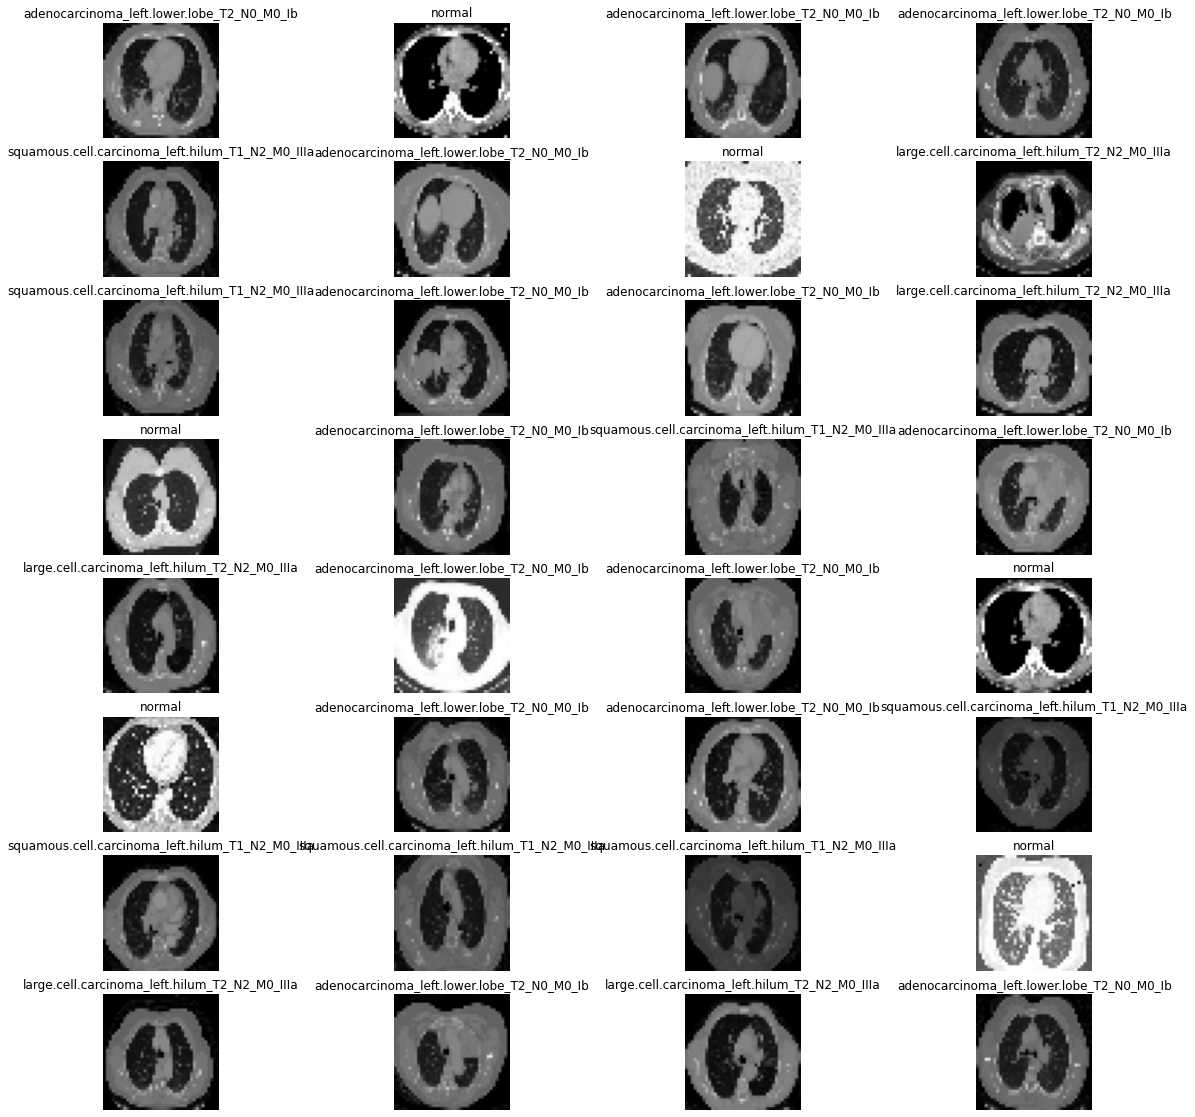

In [ ]:
import matplotlib.pyplot as plt

for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    plt.figure(figsize=(20,20))
    for i in range(BATCH_SIZE):
        plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i]/255.0)
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
    

In [ ]:
import numpy as np

num_batch=0
train_image=[]
train_label=[]
for image_batch,label_batch in train_ds:
    num_batch+=1
    train_image.append(image_batch)
    train_label.append(label_batch)
inputs=np.concatenate(train_image)
targets=np.concatenate(train_label)
print(num_batch)
print(inputs.shape)
print(targets.shape)

20
(613, 40, 40, 3)
(613,)


In [ ]:
#resizing and rescaling
resize_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(28,28),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

# DataAugmentation to Stop overfitting
data_aug=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  
])

#my custom CNN model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,3,input_shape=(32,32,3)))
model.add(resize_rescale)
model.add(data_aug)
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 32)        0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [ ]:
adam_opt_model = model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
adam_hist=model.fit(inputs,targets, validation_data=(validation_ds),epochs=100)


Epoch 1/100
20/20 [==============================] - 3s 142ms/step - loss: 1.8029 - accuracy: 0.3931 - val_loss: 2.0780 - val_accuracy: 0.1806
Epoch 2/100
20/20 [==============================] - 3s 131ms/step - loss: 1.3048 - accuracy: 0.4796 - val_loss: 1.9368 - val_accuracy: 0.1806
Epoch 3/100
20/20 [==============================] - 3s 130ms/step - loss: 1.1883 - accuracy: 0.5449 - val_loss: 2.1412 - val_accuracy: 0.1806
Epoch 4/100
20/20 [==============================] - 3s 134ms/step - loss: 1.0763 - accuracy: 0.5954 - val_loss: 2.1448 - val_accuracy: 0.1806
Epoch 5/100
20/20 [==============================] - 3s 133ms/step - loss: 1.2188 - accuracy: 0.5383 - val_loss: 1.8225 - val_accuracy: 0.2083
Epoch 6/100
20/20 [==============================] - 3s 131ms/step - loss: 1.0906 - accuracy: 0.5465 - val_loss: 1.5421 - val_accuracy: 0.3333
Epoch 7/100
20/20 [==============================] - 3s 138ms/step - loss: 1.2680 - accuracy: 0.5383 - val_loss: 1.5022 - val_accuracy: 0.2778

In [ ]:
adam_test_loss,adam_test_acc=model.evaluate(test_ds)
print(adam_test_acc) 
 

10/10 [==============================] - 0s 26ms/step - loss: 4.1779 - accuracy: 0.2476
0.24761904776096344


In [ ]:

Adamax_opt_model = model.compile(optimizer='Adamax',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
Adamax_hist=model.fit(inputs,targets, validation_data=(validation_ds),epochs=20)


Epoch 1/20
20/20 [==============================] - 3s 152ms/step - loss: 0.8032 - accuracy: 0.7178 - val_loss: 2.5978 - val_accuracy: 0.5139
Epoch 2/20
20/20 [==============================] - 3s 149ms/step - loss: 0.8420 - accuracy: 0.6884 - val_loss: 2.1630 - val_accuracy: 0.5139
Epoch 3/20
20/20 [==============================] - 3s 154ms/step - loss: 0.6918 - accuracy: 0.7162 - val_loss: 1.3201 - val_accuracy: 0.5556
Epoch 4/20
20/20 [==============================] - 3s 150ms/step - loss: 0.7265 - accuracy: 0.7325 - val_loss: 1.3033 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 3s 150ms/step - loss: 0.6513 - accuracy: 0.7210 - val_loss: 1.3011 - val_accuracy: 0.4861
Epoch 6/20
20/20 [==============================] - 3s 150ms/step - loss: 0.6822 - accuracy: 0.7031 - val_loss: 1.1933 - val_accuracy: 0.5278
Epoch 7/20
20/20 [==============================] - 3s 153ms/step - loss: 0.6889 - accuracy: 0.7439 - val_loss: 1.2105 - val_accuracy: 0.5278
Epoch 

In [ ]:
Adamax_test_loss,Adamax_test_acc=model.evaluate(test_ds)
print(Adamax_test_acc) 


10/10 [==============================] - 0s 26ms/step - loss: 3.1404 - accuracy: 0.3524
0.3523809611797333


In [ ]:
Adadelta_opt_model = model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
Adadelta_hist=model.fit(inputs,targets, validation_data=(validation_ds),epochs=20)


Epoch 1/20
20/20 [==============================] - 3s 152ms/step - loss: 0.6023 - accuracy: 0.7635 - val_loss: 1.1791 - val_accuracy: 0.5972
Epoch 2/20
20/20 [==============================] - 3s 144ms/step - loss: 0.6587 - accuracy: 0.7406 - val_loss: 1.1801 - val_accuracy: 0.5694
Epoch 3/20
20/20 [==============================] - 3s 148ms/step - loss: 0.6129 - accuracy: 0.7651 - val_loss: 1.1892 - val_accuracy: 0.5694
Epoch 4/20
20/20 [==============================] - 3s 150ms/step - loss: 0.6165 - accuracy: 0.7439 - val_loss: 1.1943 - val_accuracy: 0.5694
Epoch 5/20
20/20 [==============================] - 3s 147ms/step - loss: 0.6793 - accuracy: 0.7488 - val_loss: 1.2003 - val_accuracy: 0.5694
Epoch 6/20
20/20 [==============================] - 3s 149ms/step - loss: 0.6585 - accuracy: 0.7259 - val_loss: 1.2049 - val_accuracy: 0.5694
Epoch 7/20
20/20 [==============================] - 3s 150ms/step - loss: 0.6489 - accuracy: 0.7325 - val_loss: 1.2081 - val_accuracy: 0.5694
Epoch 

In [ ]:
Adadelta_test_loss,Adadelta_test_acc=model.evaluate(test_ds)
print(Adadelta_test_acc) 


10/10 [==============================] - 0s 32ms/step - loss: 3.5892 - accuracy: 0.3429
0.34285715222358704


In [ ]:
nadam_opt_model = model.compile(optimizer='nadam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
nadam_hist=model.fit(inputs,targets, validation_data=(validation_ds),epochs=20,batch_size=5)


Epoch 1/20
123/123 [==============================] - 5s 39ms/step - loss: 0.7171 - accuracy: 0.7243 - val_loss: 1.2470 - val_accuracy: 0.5139
Epoch 2/20
123/123 [==============================] - 5s 39ms/step - loss: 0.7724 - accuracy: 0.6868 - val_loss: 1.2345 - val_accuracy: 0.5139
Epoch 3/20
123/123 [==============================] - 5s 38ms/step - loss: 0.7897 - accuracy: 0.6998 - val_loss: 1.2541 - val_accuracy: 0.5278
Epoch 4/20
123/123 [==============================] - 5s 38ms/step - loss: 0.8204 - accuracy: 0.6688 - val_loss: 1.2560 - val_accuracy: 0.5139
Epoch 5/20
123/123 [==============================] - 5s 38ms/step - loss: 0.7116 - accuracy: 0.7259 - val_loss: 1.2572 - val_accuracy: 0.5278
Epoch 6/20
123/123 [==============================] - 5s 38ms/step - loss: 0.7199 - accuracy: 0.7194 - val_loss: 1.2477 - val_accuracy: 0.5139
Epoch 7/20
123/123 [==============================] - 5s 38ms/step - loss: 0.7561 - accuracy: 0.7113 - val_loss: 1.2517 - val_accuracy: 0.5278

In [ ]:
nadam_test_loss,nadam_test_acc=model.evaluate(test_ds)
print(nadam_test_acc) 


10/10 [==============================] - 0s 27ms/step - loss: 3.5621 - accuracy: 0.3460
0.3460317552089691


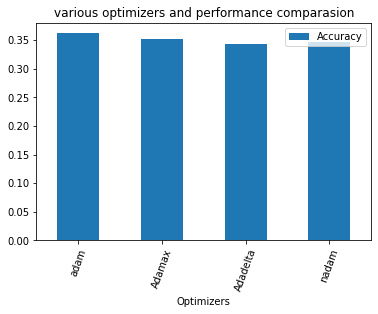

In [ ]:
import pandas as pd

import matplotlib.pyplot as plot

data = {"Optimizers":["adam", "Adamax", "Adadelta","nadam"],

        "Accuracy":[adam_test_acc,Adamax_test_acc,Adadelta_test_acc,nadam_test_acc]

        };

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Optimizers", y="Accuracy", rot=70, title="various optimizers and performance comparasion");

plot.show(block=True);

In [ ]:
import pandas as pd
print("#####################     Adam     ########################")
model_df=pd.DataFrame(adam_hist.history)
model_df['epoch']=adam_hist.epoch
print(model_df.head())

print("####################     Adamax     ########################")
model_df=pd.DataFrame(Adamax_hist.history)
model_df['epoch']=Adamax_hist.epoch
print(model_df.head())

print("###################     Adadelta     ########################")
model_df=pd.DataFrame(Adadelta_hist.history)
model_df['epoch']=Adadelta_hist.epoch
print(model_df.head())

print("#####################     nadam     ########################")
model_df=pd.DataFrame(nadam_hist.history)
model_df['epoch']=nadam_hist.epoch
print(model_df.head())


#####################     Adam     ########################
       loss  accuracy  val_loss  val_accuracy  epoch
0  0.871981  0.678630  2.559574      0.458333      0
1  0.813030  0.696574  1.691456      0.513889      1
2  0.906957  0.673736  1.848401      0.527778      2
3  1.054751  0.634584  1.926259      0.486111      3
4  0.769757  0.701468  2.429479      0.472222      4
####################     Adamax     ########################
       loss  accuracy  val_loss  val_accuracy  epoch
0  0.803203  0.717781  2.597795      0.513889      0
1  0.842010  0.688418  2.163050      0.513889      1
2  0.691840  0.716150  1.320094      0.555556      2
3  0.726511  0.732463  1.303276      0.500000      3
4  0.651305  0.721044  1.301082      0.486111      4
###################     Adadelta     ########################
       loss  accuracy  val_loss  val_accuracy  epoch
0  0.602294  0.763458  1.179064      0.597222      0
1  0.658726  0.740620  1.180097      0.569444      1
2  0.612871  0.765090 

# **Feature extraction using pretrained neural network and classify using SVM**

In [ ]:
# dataset is already loaded in top section of file


#directories
print("############  Directories  ##############\n")
print(data_dir)
print(train_dir)
print(validation_dir)
print(test_dir)

#class names

print("\n\n############  Class Names  ##############\n")
for className in class_names:
  print(className)


# train_ds,test_ds,validation_ds

print("\n\n############  train_ds,test_ds,validation_ds  ##############\n")
print('Training Batch=',train_batches.numpy())
print('Validation Batch=',validation_batches.numpy())
print('Testing Batch=',test_batches.numpy())


In [ ]:

# data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
#                                     batch_size=10,image_size=(299,299))

Found 1000 files belonging to 3 classes.


In [ ]:
# num_batch=tf.data.experimental.cardinality(data)
# print(num_batch)

tf.Tensor(100, shape=(), dtype=int64)


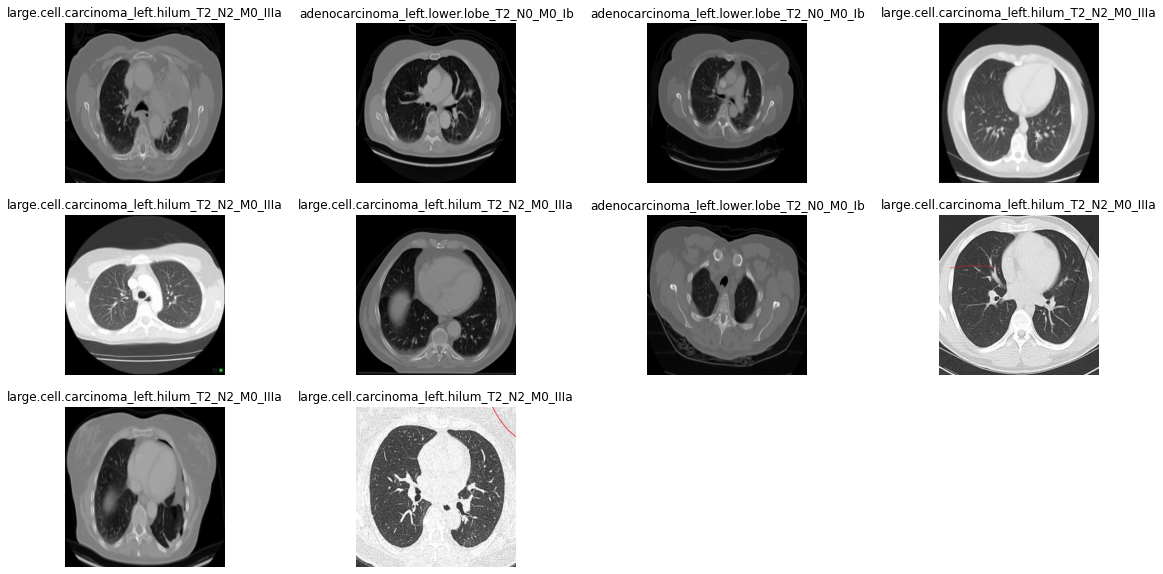

In [ ]:
image_batch,label_batch=next(iter(data))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i]/255)
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
image=[]
label=[]
for image_batch,label_batch in data:
    image.append(image_batch)
    label.append(label_batch)
import numpy as np
x_images=np.concatenate(image)
x_target=np.concatenate(label)
print(x_images.shape)
print(x_target.shape)

(1000, 299, 299, 3)
(1000,)


In [ ]:
model=tf.keras.applications.Xception(input_shape=(299,299,3),
                                    include_top=False,
                                    weights='imagenet')
inputs=tf.keras.Input(shape=(299,299,3))
x=model(inputs,training=False) # feature
x=tf.keras.layers.GlobalAveragePooling2D()(x) # 2048
x=tf.keras.layers.Dense(200)(x) # 10
x=tf.keras.layers.Dense(100)(x)
outputs=tf.keras.layers.Dense(500)(x)
model=tf.keras.Model(inputs,outputs)
model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
Total params: 21,341,880
Trainable params: 21,287,352
N

In [ ]:
 feat=model.predict(x_images)
 print(feat.shape) # 60x10

(1000, 500)


In [ ]:

import pandas as pd
x = pd.DataFrame(feat)
y = pd.DataFrame(x_target)
print(x.shape)
print(y.shape)

(1000, 500)
(1000, 1)


In [ ]:
############# train_test_split
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,
                                                 random_state=0)
print(x_train.shape)
print(x_test.shape)
################# Standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
##################### SVM
from sklearn.svm import SVC
clf=SVC()
svm.fit(x_train_std,y_train)
y_pred=svm.predict(x_test_std)

################### Accuracy, Precision ,Confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Accuracy
train_acc=accuracy_score(voter.predict(x_train_std),y_train)
test_acc=accuracy_score(y_pred,y_test)
print('Training acc=',train_acc*100)
print('Testing acc=',test_acc*100)

# Precision
precision=precision_score(y_pred,y_test, average='weighted')
print(precision)

# Confusion matrix
conf = sklearn.metrics.confusion_matrix(y_pred,y_test)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

(800, 500)
(200, 500)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training acc= 86.5
Testing acc= 85.5


# **Feature extrected bypretrained neural network and Classify using majority voting** 

In [ ]:
# dataset is already loaded in top section of file


#directories
print("############  Directories  ##############\n")
print(data_dir)
print(train_dir)
print(validation_dir)
print(test_dir)

#class names

print("\n\n############  Class Names  ##############\n")
for className in class_names:
  print(className)


# train_ds,test_ds,validation_ds

print("\n\n############  train_ds,test_ds,validation_ds  ##############\n")
print('Training Batch=',train_batches.numpy())
print('Validation Batch=',validation_batches.numpy())
print('Testing Batch=',test_batches.numpy())


# features 

print("\n\n############  features  ##############\n")
print(feat.shape) 

# x_train,x_test,y_train,y_test
print("\n\n############  x_train,x_test,y_train,y_test  ##############\n")
print(x_train)
print(x_test)
print(y_train)
print(y_test)

In [ ]:

#################### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

####################### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

########################### GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#########################  KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


##################### Majority Voting
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('Random Forest',rfc),('Decision Tree',dt),('bayes',gnb),('K-neighbors',knn)],voting='soft')
voter.fit(x_train_std,y_train)
y_pred=voter.predict(x_test_std)
x_train_std,y_train y_test


################### Accuracy, Precision ,Confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Accuracy
train_acc=accuracy_score(voter.predict(x_train_std),y_train)
test_acc=accuracy_score(y_pred,y_test)
print('Training acc=',train_acc*100)
print('Testing acc=',test_acc*100)

# Precision
precision=precision_score(y_pred,y_test, average='weighted')
print(precision)

# Confusion matrix
conf = sklearn.metrics.confusion_matrix(y_pred,y_test)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training acc= 94.375
Testing acc= 78.5
